## Imports and Groundwork

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib

## Pick a place to make a map
In this case I made one for Amsterdam

In [2]:
place = 'Amsterdam, Netherlands'
Graph = ox.graph_from_address(place,
                              network_type = 'walk',
                              dist = 3000,
                              dist_type = 'network'
                             )

### Plotting the city

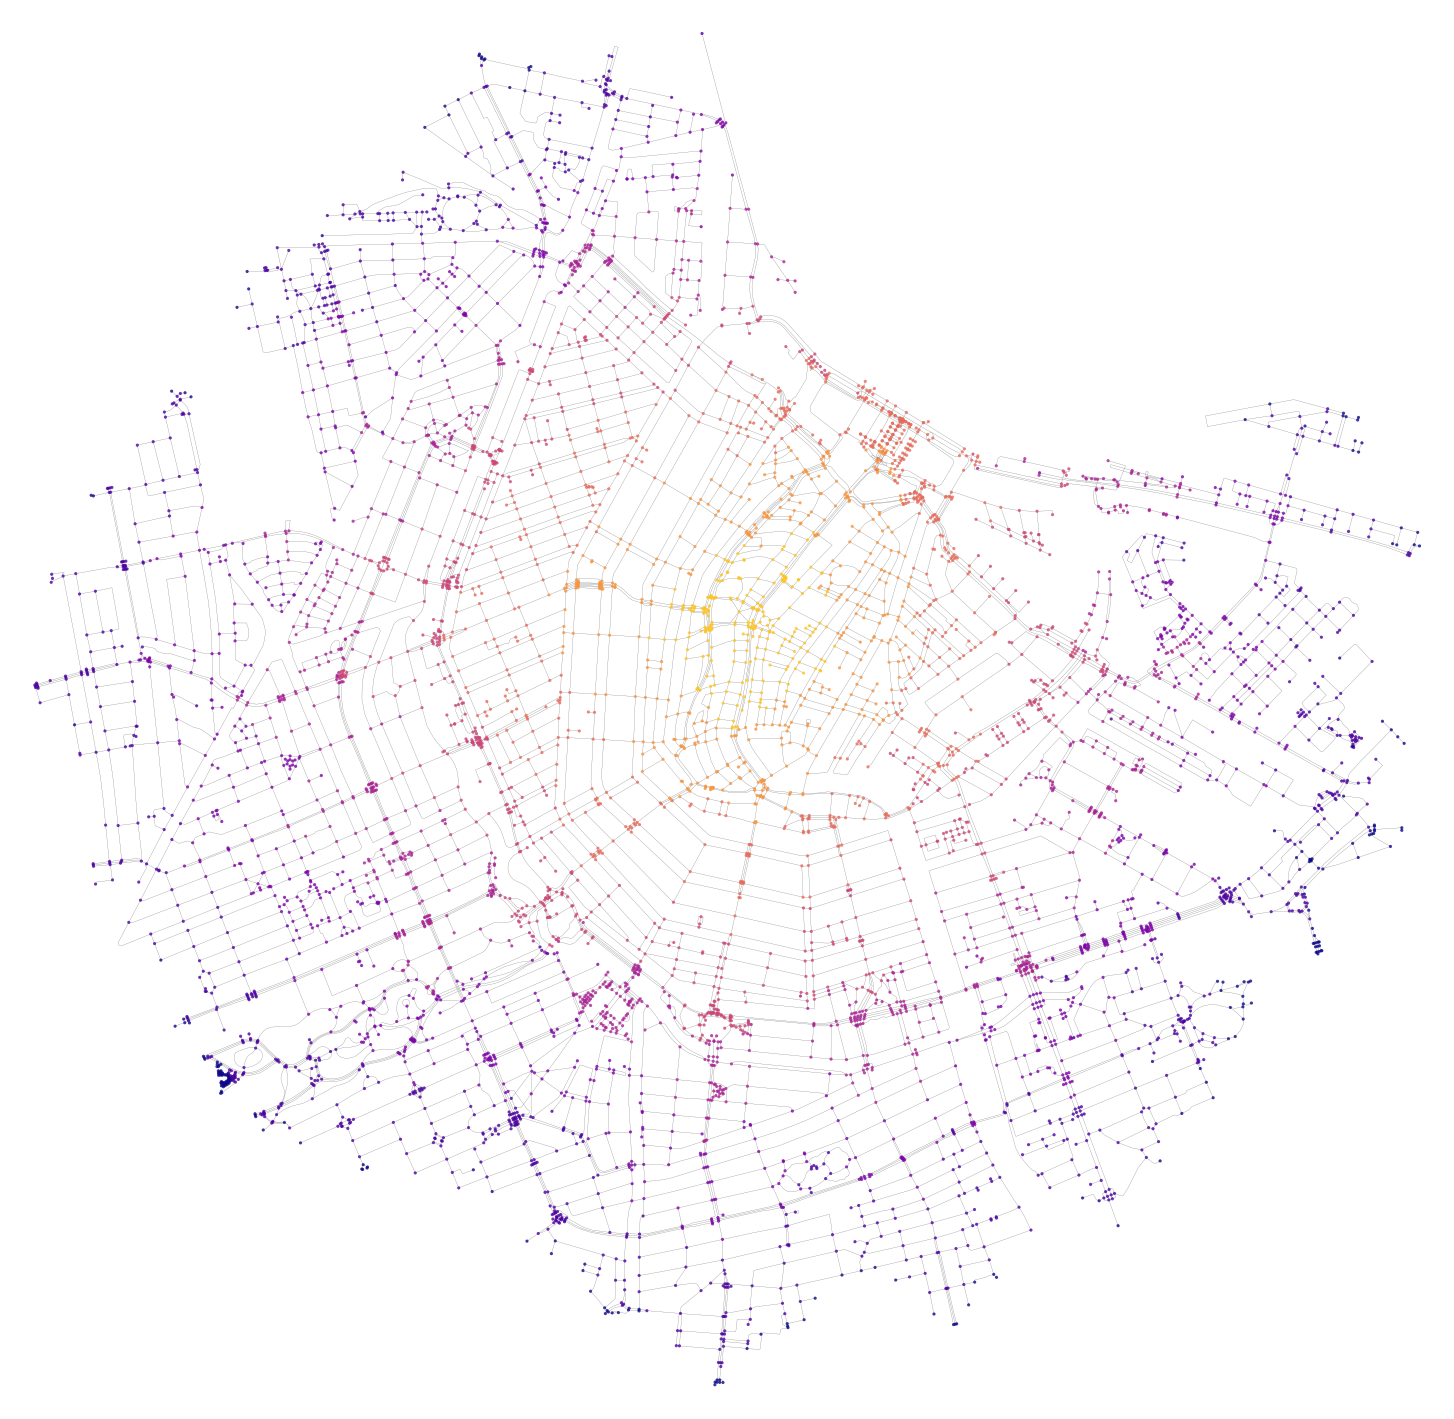

In [3]:
# How big of a radius do we want to get? 
trip_times = list(range(0,45, 5))
travel_speed = 5

# Dam Square
latlon = (52.372967, 4.892598)
center_node = ox.nearest_nodes(Graph, latlon[1], latlon[0])

# Compute the time it takes to traverse this segment
meters_per_minute = travel_speed * 1000 / 60 
for u, v, k, data in Graph.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
# Make a colour pallette for the illustration
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)

node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(Graph, center_node, radius=trip_time,  distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in Graph.nodes()]
ns = [10 if node in node_colors else 0 for node in Graph.nodes()]

# plot graph
plot_size = 20
fig, ax = ox.plot_graph(Graph, 
                        node_color=nc, 
                        node_size=ns, 
                        node_alpha=0.8, 
                        node_zorder=2,
                        bgcolor='k', 
                        edge_linewidth=0.2, 
                        edge_color='#999999', 
                        figsize = (plot_size,plot_size),
                        save = True, 
                        filepath = './amsterdam.svg'
                       )